In [71]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from umap import UMAP
import plotly.express as px
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from plotly.figure_factory import create_dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import mutual_info_score, normalized_mutual_info_score, adjusted_mutual_info_score
from sklearn.metrics.pairwise import cosine_similarity


sns.set_style('white')

In [72]:
t2_df = pd.read_csv('./t2_new.csv', sep=',', header=0, index_col=0)
t2_df.index = [i.split('.')[0] for i in t2_df.index]

In [73]:
t2_df

,Orientation,BrainRgn,Age,Sex,Nodes,SomaSurface,Stems,Bifurcations,Branches,Tips,...,Volume,MaxEuclideanDistance,MaxPathDistance,MaxBranchOrder,AverageContraction,AverageFragmentation,AverageParent-daughterRatio,AverageBifurcationAngleLocal,AverageBifurcationAngleRemote,HausdorffDimension
00005_P001_T01-S001_MFG_R0460_WY-20220415_LJ_stamp_2022_08_10_09_53,B,MFG,49,M,1749,12.5664,8,40,86,47,...,7979.01,140.560,161.173,5,0.913690,19.3256,1.000000,88.3595,60.3844,1.06136
00006_P001_T01-S001_MFG_R0460_WY-20220415_LJ_stamp_2022_08_10_10_54,B,MFG,49,M,1777,12.5664,8,31,68,38,...,7703.82,137.156,181.177,7,0.905318,25.1176,1.000000,75.3405,55.8170,1.10491
00008_P001_T01-S001_MFG_R0460_WY-20220415_YXQ_stamp_2022_08_11_10_02,B,MFG,49,M,1639,12.5664,8,33,72,40,...,7415.34,136.949,184.228,6,0.903052,21.7500,1.000000,76.2666,59.6023,1.07386
00011_P001_T01-S002_MFG_R0460_WY-20220415_XJ_stamp_2022_08_31_14_28,B,MFG,49,M,1143,12.5664,10,37,82,46,...,16137.40,121.641,145.138,7,0.884827,12.9268,1.233460,68.6457,74.3453,1.11178
00014_P001_T01-S002_MFG_R0460_WY-20220415_YXQ_stamp_2022_08_31_14_30,T,MFG,49,M,1309,25048.1000,11,47,104,58,...,50325.50,149.189,209.372,9,0.932546,11.5769,0.863606,69.6403,59.4337,1.10682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01698_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_stamp_2022_08_22_15_41,T,PL,41,F,724,12.5664,8,25,56,32,...,5238.61,152.675,179.698,4,0.934485,11.9107,1.000000,68.2542,55.4037,1.04172
01699_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_stamp_2022_08_25_09_12,T,PL,41,F,1490,12.5664,10,31,70,40,...,6543.71,120.939,143.704,7,0.908536,20.2714,1.000000,77.3570,62.6581,1.05175
01701_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_stamp_2022_08_22_15_22,T,PL,41,F,906,12.5664,5,36,75,40,...,5468.23,144.298,176.232,8,0.921007,11.0667,1.000000,88.5365,58.5789,1.04628
01738_P018_T01-S029_SPL_R0613_LJ-20220728_YXQ_stamp_2022_08_25_09_11,A,PL,41,F,1953,12.5664,9,45,98,54,...,10330.40,195.884,217.704,8,0.904601,18.9184,1.000000,82.1884,56.0901,1.11766


In [74]:
table_df = pd.read_csv('./px2um_Apical_dendrite101_sa5um_rotate.csv', sep=',', header=0, index_col=0)
print(list(table_df.columns))
table_df = table_df.iloc[:, 0:60]
# table_df
for i in table_df.index:
    for j in ['01645']:
        if i.startswith(j):
            print(t2_df.loc[i,'BrainRgn'])
            table_df.drop(i, inplace=True)
table_df

['0', '5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55', '60', '65', '70', '75', '80', '85', '90', '95', '100', '105', '110', '115', '120', '125', '130', '135', '140', '145', '150', '155', '160', '165', '170', '175', '180', '185', '190', '195', '200', '205', '210', '215', '220', '225', '230', '235', '240', '245', '250', '255', '260', '265', '270', '275', '280', '285', '290', '295', '300', '305', '310', '315', '320', '325', '330', '335', '340', '345', '350', '355', '360', '365', '370', '375', '380', '385', '390', '395', '400', '405', '410', '415', '420', '425', '430', '435', '440', '445', '450', '455', '460', '465', '470', '475', '480', '485', '490', '495', '500', '505', '510', '515', '520', '525', '530', '535', '540', '545', '550', '555', '560', '565', '570', '575', '580', '585', '590', '595']
PL


,0,5,10,15,20,25,30,35,40,45,...,250,255,260,265,270,275,280,285,290,295
Distance_to_soma,,,,,,,,,,,,,,,,,,,,,
00023_P001_T01-S001_MFG_R0460_WY-20220415_GYC_stamp_2022_08_31_14_32,10,10,10,11,14,15,15,16,18,21,...,0,0,0,0,0,0,0,0,0,0
00030_P001_T01-S001_MFG_R0460_WY-20220415_GYC_stamp_2022_08_31_14_36,10,10,10,10,10,12,13,15,16,17,...,0,0,0,0,0,0,0,0,0,0
00031_P001_T01-S001_MFG_R0460_WY-20220415_GYC_stamp_2022_08_31_14_39,8,8,8,8,8,10,10,9,11,13,...,0,0,0,0,0,0,0,0,0,0
00044_P001_T01-S002_MFG_R0460_WY-20220415_YXQ_stamp_2022_08_31_14_42,8,8,8,10,11,12,12,12,13,18,...,0,0,0,0,0,0,0,0,0,0
00045_P001_T01-S002_MFG_R0460_WY-20220415_YXQ_stamp_2022_06_24_16_16,8,8,8,9,10,14,23,25,30,35,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01678_P018_T01-S014_SPL_R0919_LJ-20220728_YXQ_stamp_2022_08_27_13_21,6,6,6,6,6,8,12,15,16,17,...,3,4,4,4,3,3,3,3,3,2
01683_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_stamp_2022_08_27_13_28,11,11,11,13,18,24,25,27,29,26,...,0,0,0,0,0,0,0,0,0,0
01684_P018_T01-S014_SPL_R0613_LJ-20220728_YXQ_stamp_2022_08_27_13_31,9,9,9,10,13,15,18,24,27,27,...,0,0,0,0,0,0,0,0,0,0


In [75]:
# table_df = pd.read_csv('./px2um_Basal_dendrite259_sa5um_rotate.csv', sep=',', header=0, index_col=0)
# print(list(table_df.columns))
# table_df = table_df.iloc[:, 0:60]
# # table_df
# for i in table_df.index:
#     for j in ['00906', '00912', '00913']:
#         if i.startswith(j):
#             print(t2_df.loc[i,'BrainRgn'])
#             table_df.drop(i, inplace=True)
# table_df

In [76]:
# t2_df = pd.read_csv('./t2_new.csv', sep=',', header=0, index_col=0)
# t2_df.index = [i.split('.')[0] for i in t2_df.index]
t2_df = t2_df.loc[table_df.index, :]
print(list(t2_df.columns), '\n')
print(list(t2_df['Orientation'].unique()))
# t2_df = t2_df[t2_df.Orientation.isin(['T'])] # A, B, T

labels_ori = t2_df[['BrainRgn', 'Age', 'Sex']]
# df = t2_df[['Stems', 'Branches', 'Length', 'AverageBifurcationAngleLocal',
#        'AverageBifurcationAngleRemote', 'HausdorffDimension']]

hue_type = 'BrainRgn'
# 'BrainRgn', 'Age', 'Sex'
# labels = df['Stems'].copy()

# 选择不同的bin去划分age，此时是以8作为宽度
# for i in labels_ori.index:
#     labels_ori.loc[i,'Age'] = int(labels_ori.loc[i,'Age']/4)*4

print('ori labels: ',labels_ori[hue_type].unique())
print(labels_ori[hue_type].value_counts(), '\n')

# 1
# labels = labels_ori.loc[~labels_ori.BrainRgn.isin(['SMFG', 'SMIFG','SFG','MTG','IFG']), [hue_type]]
# labels_ori = labels_ori[~labels_ori.BrainRgn.isin(['SMFG', 'SMIFG','SFG','MTG','IFG'])]

# 2
# labels = labels_ori.loc[labels_ori.BrainRgn.isin(['PL','IPL']), [hue_type]]
# labels_ori = labels_ori[labels_ori.BrainRgn.isin(['PL','IPL'])]

# df = df.loc[labels.index,:]
# df = df.iloc[:, 3:]

# print('after labels: ', labels[hue_type].unique())
# print(labels[hue_type].value_counts())
# labels

['Orientation', 'BrainRgn', 'Age', 'Sex', 'Nodes', 'SomaSurface', 'Stems', 'Bifurcations', 'Branches', 'Tips', 'OverallWidth', 'OverallHeight', 'OverallDepth', 'AverageDiameter', 'Length', 'Surface', 'Volume', 'MaxEuclideanDistance', 'MaxPathDistance', 'MaxBranchOrder', 'AverageContraction', 'AverageFragmentation', 'AverageParent-daughterRatio', 'AverageBifurcationAngleLocal', 'AverageBifurcationAngleRemote', 'HausdorffDimension'] 

['A']
ori labels:  ['MFG' 'IPL' 'TP' 'STG' 'SFG' 'PL' 'SMIFG']
TP       30
MFG      24
IPL      18
PL       14
STG      10
SFG       3
SMIFG     1
Name: BrainRgn, dtype: int64 



In [77]:
labels_ori

,BrainRgn,Age,Sex
Distance_to_soma,,,
00023_P001_T01-S001_MFG_R0460_WY-20220415_GYC_stamp_2022_08_31_14_32,MFG,49,M
00030_P001_T01-S001_MFG_R0460_WY-20220415_GYC_stamp_2022_08_31_14_36,MFG,49,M
00031_P001_T01-S001_MFG_R0460_WY-20220415_GYC_stamp_2022_08_31_14_39,MFG,49,M
00044_P001_T01-S002_MFG_R0460_WY-20220415_YXQ_stamp_2022_08_31_14_42,MFG,49,M
00045_P001_T01-S002_MFG_R0460_WY-20220415_YXQ_stamp_2022_06_24_16_16,MFG,49,M
...,...,...,...
01678_P018_T01-S014_SPL_R0919_LJ-20220728_YXQ_stamp_2022_08_27_13_21,PL,41,F
01683_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_stamp_2022_08_27_13_28,PL,41,F
01684_P018_T01-S014_SPL_R0613_LJ-20220728_YXQ_stamp_2022_08_27_13_31,PL,41,F


## clustermap plot

In [78]:
table_df

,0,5,10,15,20,25,30,35,40,45,...,250,255,260,265,270,275,280,285,290,295
Distance_to_soma,,,,,,,,,,,,,,,,,,,,,
00023_P001_T01-S001_MFG_R0460_WY-20220415_GYC_stamp_2022_08_31_14_32,10,10,10,11,14,15,15,16,18,21,...,0,0,0,0,0,0,0,0,0,0
00030_P001_T01-S001_MFG_R0460_WY-20220415_GYC_stamp_2022_08_31_14_36,10,10,10,10,10,12,13,15,16,17,...,0,0,0,0,0,0,0,0,0,0
00031_P001_T01-S001_MFG_R0460_WY-20220415_GYC_stamp_2022_08_31_14_39,8,8,8,8,8,10,10,9,11,13,...,0,0,0,0,0,0,0,0,0,0
00044_P001_T01-S002_MFG_R0460_WY-20220415_YXQ_stamp_2022_08_31_14_42,8,8,8,10,11,12,12,12,13,18,...,0,0,0,0,0,0,0,0,0,0
00045_P001_T01-S002_MFG_R0460_WY-20220415_YXQ_stamp_2022_06_24_16_16,8,8,8,9,10,14,23,25,30,35,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01678_P018_T01-S014_SPL_R0919_LJ-20220728_YXQ_stamp_2022_08_27_13_21,6,6,6,6,6,8,12,15,16,17,...,3,4,4,4,3,3,3,3,3,2
01683_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_stamp_2022_08_27_13_28,11,11,11,13,18,24,25,27,29,26,...,0,0,0,0,0,0,0,0,0,0
01684_P018_T01-S014_SPL_R0613_LJ-20220728_YXQ_stamp_2022_08_27_13_31,9,9,9,10,13,15,18,24,27,27,...,0,0,0,0,0,0,0,0,0,0


In [79]:
# r = 1 - np.linspace(1,60,60)/60

# for i in range(len(table_df)):
#     table_df.iloc[0] = table_df.iloc[0]*r
    
# table_df

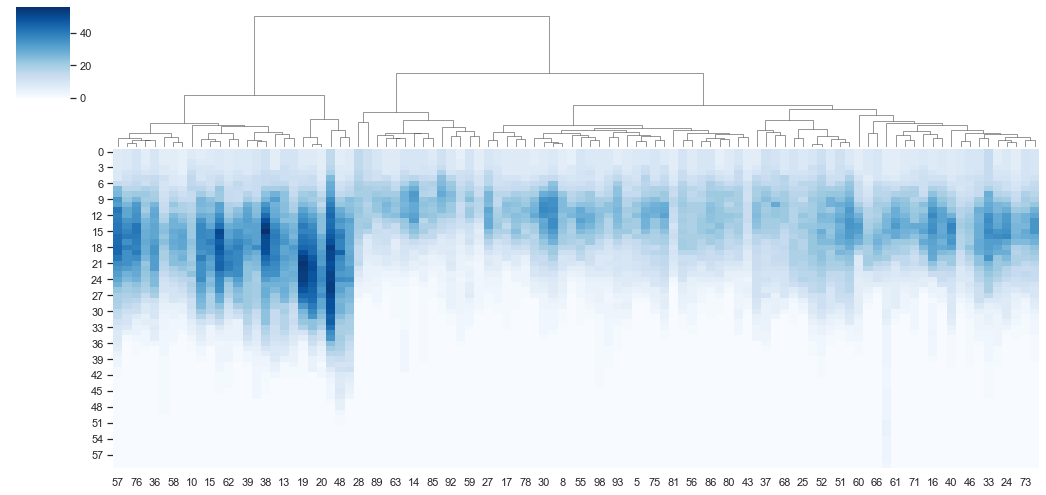

In [80]:
data_df = table_df.T
sns.set(style='white')
g = sns.clustermap(data_df.values, cmap= 'Blues',
                    col_cluster=True, row_cluster=False, 
#                     col_colors=[cl2color[i] for i in labels], 
                   figsize=(15,7),
                   dendrogram_ratio=(0.1, 0.3),
                   metric='cosine'
#                    method = 'centroid'
                   )

g.ax_heatmap.tick_params('y',which='major', left=True, right=False, reset=True,)

g.savefig('./clustermap.png', dpi=200,bbox_inches='tight')

In [81]:
gdata2d = g.data2d.T.copy()
gdata2d

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
57,7,7,7,7,8,8,14,25,26,34,...,0,0,0,0,0,0,0,0,0,0
49,8,8,8,8,10,11,13,16,20,22,...,0,0,0,0,0,0,0,0,0,0
76,10,10,10,10,11,13,15,16,21,26,...,0,0,0,0,0,0,0,0,0,0
11,6,6,6,7,9,13,12,18,21,20,...,0,0,0,0,0,0,0,0,0,0
36,9,9,9,9,10,14,15,17,19,20,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,6,6,6,8,9,10,14,15,17,21,...,0,0,0,0,0,0,0,0,0,0
24,8,8,8,8,9,10,12,12,16,20,...,0,0,0,0,0,0,0,0,0,0
74,6,6,6,6,7,8,9,10,13,14,...,0,0,0,0,0,0,0,0,0,0
73,10,10,10,10,10,10,11,14,18,20,...,0,0,0,0,0,0,0,0,0,0


In [89]:
corre_matrix = np.eye((len(gdata2d)), len(gdata2d))
for i in range(len(corre_matrix)):
    for j in range(len(corre_matrix)):
        if j == i:
            continue
#         tmp = np.corrcoef(gdata2d.iloc[i, :], gdata2d.iloc[j, :])
#         corre_matrix[i,j] = tmp[0][1]
        tmp = cosine_similarity(gdata2d.iloc[i, :].values.reshape(1, -1), gdata2d.iloc[j, :].values.reshape(1, -1))
        corre_matrix[i,j] = tmp

In [90]:
# corre_matrix = np.corrcoef(data_df, data_df)
# corre_matrix
tmp

array([[0.99171281]])

In [91]:
tmp

array([[0.99171281]])

In [92]:
corre_matrix

array([[1.        , 0.99118809, 0.99049027, ..., 0.96727031, 0.95159711,
        0.95606324],
       [0.99118809, 1.        , 0.99508   , ..., 0.97235584, 0.95471711,
        0.95834183],
       [0.99049027, 0.99508   , 1.        , ..., 0.98120631, 0.9695937 ,
        0.97145385],
       ...,
       [0.96727031, 0.97235584, 0.98120631, ..., 1.        , 0.99051422,
        0.99195181],
       [0.95159711, 0.95471711, 0.9695937 , ..., 0.99051422, 1.        ,
        0.99171281],
       [0.95606324, 0.95834183, 0.97145385, ..., 0.99195181, 0.99171281,
        1.        ]])

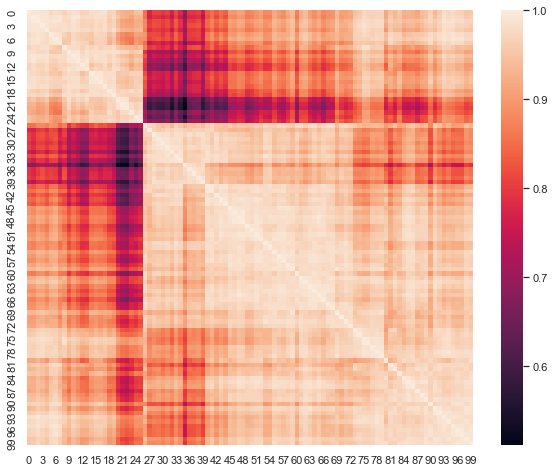

In [93]:
sns.set(style='white', )
f, ax = plt.subplots(1,1, figsize=(10,8))
sns.heatmap(corre_matrix, ax=ax)
plt.savefig('corre_matrix_heatmap.png', dpi=200, bbox_inches='tight')

In [53]:
Z = g.dendrogram_col.linkage
clustering_labels = fcluster(Z, t=0.08, criterion='distance')
print(np.unique(clustering_labels))
print(clustering_labels)

[1 2 3]
[3 3 3 1 3 3 2 3 3 3 2 3 3 3 2 3 2 2 2 3 3 3 3 3 3 2 2 3 2 2 2 3 3 3 3 3 3
 3 3 1 3 1 3 3 3 3 3 1 1 1 3 1 1 1 3 1 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 1
 3 1 3 3 3 1 1 3 3 2 3 3 2 3 3 1 1 1 1 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 2 2 2
 3 3 2 3 3 3 3 3 3 3 3 2 3 2 3 3 2 3 3 2 3 3 3 1 3 3 3 3 1 1 1 3 3 3 3 3 3
 3 2 3 2 2 2 3 3 3 3 3 3 1 3 2 3 1 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 1 1 3 3 3 3 3 3 2 3 3 3 3 3 3 3 1 3 3 3 3 3
 1 3 3 3 3 3 3 2 1 3 3 3 2 3 3 3 3 3 1 1 3 1 3 1 3 1 1 3 3 1 1 3 3 1]


In [54]:
table_df

,0,5,10,15,20,25,30,35,40,45,...,250,255,260,265,270,275,280,285,290,295
Distance_to_soma,,,,,,,,,,,,,,,,,,,,,
00005_P001_T01-S001_MFG_R0460_WY-20220415_LJ_stamp_2022_08_10_09_53,8,8,8,8,9,10,11,13,16,17,...,0,0,0,0,0,0,0,0,0,0
00006_P001_T01-S001_MFG_R0460_WY-20220415_LJ_stamp_2022_08_10_10_54,8,8,8,8,9,10,13,16,18,23,...,0,0,0,0,0,0,0,0,0,0
00008_P001_T01-S001_MFG_R0460_WY-20220415_YXQ_stamp_2022_08_11_10_02,8,8,8,9,9,12,13,14,17,19,...,0,0,0,0,0,0,0,0,0,0
00011_P001_T01-S002_MFG_R0460_WY-20220415_XJ_stamp_2022_08_31_14_28,10,10,10,12,16,19,24,27,32,29,...,0,0,0,0,0,0,0,0,0,0
00068_P003_T01-S000_S(M)TG_R0460_WY-20220513_XJ_stamp_2022_08_10_14_31,9,9,9,9,10,11,12,15,22,27,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01538_P018_T01-S009_SPL_R0460_LJ-20220728_LJ_stamp_2022_08_12_16_59,12,12,12,12,12,14,17,19,25,25,...,0,0,0,0,0,0,0,0,0,0
01574_P019_T03-S004_SFG_R0460_GYC-20220711_LJ_stamp_2022_08_26_17_02,11,11,12,13,12,15,20,23,26,29,...,0,0,0,0,0,0,0,0,0,0
01579_P019_T03-S004_SFG_R0460_GYC-20220711_LJ_stamp_2022_08_30_16_48,7,7,7,7,8,9,15,19,25,26,...,0,0,0,0,0,0,0,0,0,0


In [55]:
table_df['labels'] = clustering_labels
data_df = table_df[['labels']].T
data_df = data_df.iloc[:, g.data2d.columns.tolist()]
data_df = data_df.T
data_df['BrainRgn'] = 0
data_df['Age'] = 0
data_df['Sex'] = 0
for i in data_df.index:
    data_df.loc[i,'BrainRgn'] = labels_ori.loc[i,'BrainRgn']
    data_df.loc[i,'Age'] = labels_ori.loc[i,'Age']
    data_df.loc[i,'Sex'] = labels_ori.loc[i,'Sex']
    
for i in range(10):
    data_df['random_labels'+str(i+1)] = np.random.randint(1,len(np.unique(clustering_labels)),len(clustering_labels))
data_df

,labels,BrainRgn,Age,Sex,random_labels1,random_labels2,random_labels3,random_labels4,random_labels5,random_labels6,random_labels7,random_labels8,random_labels9,random_labels10
Distance_to_soma,,,,,,,,,,,,,,
00011_P001_T01-S002_MFG_R0460_WY-20220415_XJ_stamp_2022_08_31_14_28,1,MFG,49,M,2,1,1,1,2,1,1,2,2,2
01186_P010_T01-S014_TP_R0460_LJ-20220607_GYC_stamp_2022_08_26_14_06,1,TP,41,M,1,2,1,1,2,1,1,1,1,1
00435_P005_T01-S006_MFG_R0509_LJ-20220525_YXQ_stamp_2022_07_26_15_48,1,MFG,36,F,2,1,1,1,2,1,2,1,1,2
00388_P005_T01-S005_MFG_R0509_LJ-20220525_XJ_stamp_2022_07_22_17_01,1,MFG,36,F,2,2,2,2,2,2,1,2,1,2
00395_P005_T01-S005_MFG_R0509_LJ-20220525_LJ_stamp_2022_07_22_17_04,1,MFG,36,F,2,2,2,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00555_P006_T01-S003_STG_R0509_LJ-20220530_YXQ_stamp_2022_08_02_17_07,3,STG,63,M,2,1,1,2,2,1,1,1,2,2
00647_P006_T01-S004_STG_R0509_LJ-20220530_LJ_stamp_2022_08_15_15_38,3,STG,63,M,1,1,1,1,2,1,1,2,2,1
00582_P006_T01-S003_STG_R0509_LJ-20220530_LJ_stamp_2022_08_04_16_28,3,STG,63,M,1,2,1,1,1,1,1,1,2,1


In [56]:
# print(mutual_info_score(labels_ori['labels'], labels_ori['BrainRgn']))
# print(mutual_info_score(labels_ori['labels'], labels_ori['Age']))
# print(mutual_info_score(labels_ori['labels'], labels_ori['Sex']))
MI_df = pd.DataFrame(columns=['lable_type', 'hue_type', 'NMI'])
for lt_i in ['labels']+['random_labels'+str(i+1) for i in range(10)]:
    for ht_j in ['BrainRgn', 'Age', 'Sex']:
        if lt_i.startswith('random'):
            lt_i1 = 'random_labels'
        else:
            lt_i1 = lt_i
        tmp_df = pd.DataFrame({'lable_type':[lt_i1], 'hue_type': [ht_j], 'NMI':[normalized_mutual_info_score(data_df[lt_i], data_df[ht_j])]})
        MI_df = pd.concat([MI_df, tmp_df], axis=0)
MI_df

,lable_type,hue_type,NMI
0,labels,BrainRgn,0.058129
0,labels,Age,0.050777
0,labels,Sex,0.006999
0,random_labels,BrainRgn,0.015915
0,random_labels,Age,0.027769
0,random_labels,Sex,0.000853
0,random_labels,BrainRgn,0.009687
0,random_labels,Age,0.011036
0,random_labels,Sex,0.003336
0,random_labels,BrainRgn,0.009898


In [57]:
group_values = MI_df.groupby(['hue_type','lable_type']).mean().reset_index()
# group_values.sort_values('hue_type', o)
group_values.sort_values('hue_type', inplace=True)
group_values

,hue_type,lable_type,NMI
0,Age,labels,0.050777
1,Age,random_labels,0.017549
2,BrainRgn,labels,0.058129
3,BrainRgn,random_labels,0.012984
4,Sex,labels,0.006999
5,Sex,random_labels,0.003322


In [58]:
coordinates_dict = {'Age':0, 'BrainRgn':1, 'Sex':2}
offset_dict = {'labels':-0.2, 'random_labels':0.2}

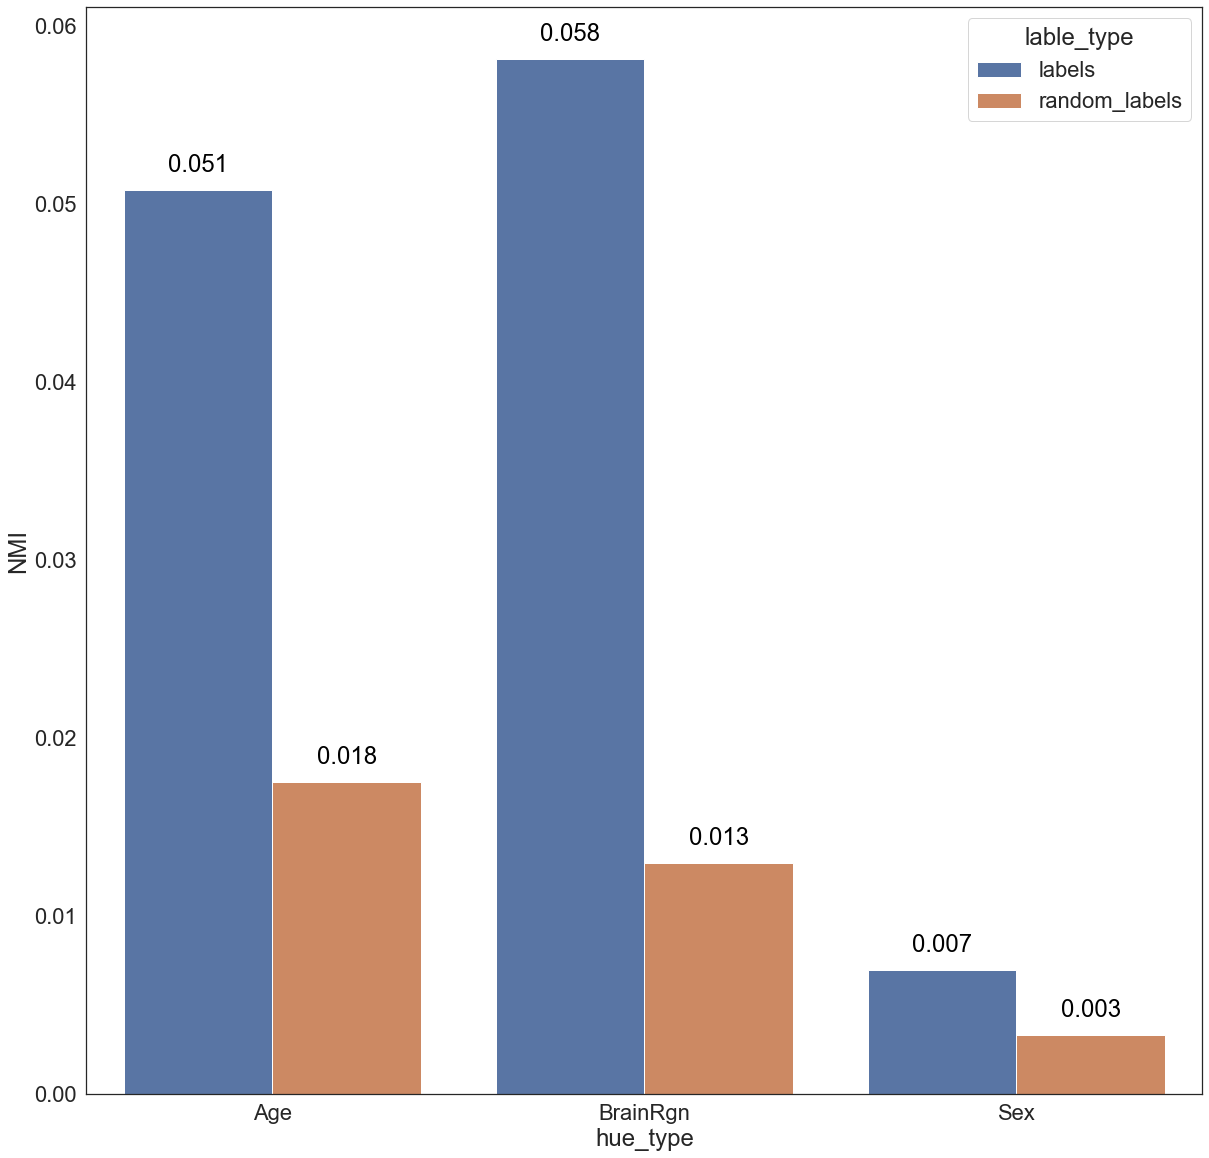

In [59]:
# sns.set(style='white', font_scale=2,)
# plt.figure(figsize=(20,20))
# sns.barplot(data = MI_df, x='hue_type', y='NMI', hue='lable_type')
# plt.savefig('./NMI.png', dpi=200, bbox_inches='tight')

sns.set(style='white', font_scale=2,)
plt.figure(figsize=(20,20))
g = sns.barplot(data = group_values, x='hue_type', y='NMI', hue='lable_type')

for index,row in group_values.iterrows():
    g.text(coordinates_dict[row.hue_type]+offset_dict[row.lable_type], row.NMI+0.001, round(row.NMI,3),color="black",ha="center")
plt.savefig('./MI.png', dpi=200, bbox_inches='tight')

In [60]:
# print(mutual_info_score(data_df['labels'], data_df['BrainRgn']))
# print(mutual_info_score(data_df['labels'], data_df['Age']))
# print(mutual_info_score(data_df['labels'], data_df['Sex']))


In [61]:
# print(mutual_info_score(data_df['random_labels1'], data_df['BrainRgn']))
# print(mutual_info_score(data_df['random_labels1'], data_df['Age']))
# print(mutual_info_score(data_df['random_labels1'], data_df['Sex']))


In [62]:
data_df['top1'] = 0
data_df['top2'] = 0
data_df['top3'] = 0
data_df['top4'] = 0
data_df['top5'] = 0
data_df

,labels,BrainRgn,Age,Sex,random_labels1,random_labels2,random_labels3,random_labels4,random_labels5,random_labels6,random_labels7,random_labels8,random_labels9,random_labels10,top1,top2,top3,top4,top5
Distance_to_soma,,,,,,,,,,,,,,,,,,,
00011_P001_T01-S002_MFG_R0460_WY-20220415_XJ_stamp_2022_08_31_14_28,1,MFG,49,M,2,1,1,1,2,1,1,2,2,2,0,0,0,0,0
01186_P010_T01-S014_TP_R0460_LJ-20220607_GYC_stamp_2022_08_26_14_06,1,TP,41,M,1,2,1,1,2,1,1,1,1,1,0,0,0,0,0
00435_P005_T01-S006_MFG_R0509_LJ-20220525_YXQ_stamp_2022_07_26_15_48,1,MFG,36,F,2,1,1,1,2,1,2,1,1,2,0,0,0,0,0
00388_P005_T01-S005_MFG_R0509_LJ-20220525_XJ_stamp_2022_07_22_17_01,1,MFG,36,F,2,2,2,2,2,2,1,2,1,2,0,0,0,0,0
00395_P005_T01-S005_MFG_R0509_LJ-20220525_LJ_stamp_2022_07_22_17_04,1,MFG,36,F,2,2,2,2,2,2,2,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00555_P006_T01-S003_STG_R0509_LJ-20220530_YXQ_stamp_2022_08_02_17_07,3,STG,63,M,2,1,1,2,2,1,1,1,2,2,0,0,0,0,0
00647_P006_T01-S004_STG_R0509_LJ-20220530_LJ_stamp_2022_08_15_15_38,3,STG,63,M,1,1,1,1,2,1,1,2,2,1,0,0,0,0,0
00582_P006_T01-S003_STG_R0509_LJ-20220530_LJ_stamp_2022_08_04_16_28,3,STG,63,M,1,2,1,1,1,1,1,1,2,1,0,0,0,0,0


In [63]:
for k,i in enumerate(data_df.index):
    topkmax_args = list(np.argsort(corre_matrix[k], axis=-1)[::-1][0:6])
    topkmax_args.remove(k)
    for k,topi in enumerate(topkmax_args):
        data_df.loc[i, 'top'+str(k+1)] = data_df.index[topi]
data_df

,labels,BrainRgn,Age,Sex,random_labels1,random_labels2,random_labels3,random_labels4,random_labels5,random_labels6,random_labels7,random_labels8,random_labels9,random_labels10,top1,top2,top3,top4,top5
Distance_to_soma,,,,,,,,,,,,,,,,,,,
00011_P001_T01-S002_MFG_R0460_WY-20220415_XJ_stamp_2022_08_31_14_28,1,MFG,49,M,2,1,1,1,2,1,1,2,2,2,01186_P010_T01-S014_TP_R0460_LJ-20220607_GYC_s...,00388_P005_T01-S005_MFG_R0509_LJ-20220525_XJ_s...,00611_P006_T01-S005_STG_R0509_LJ-20220530_XJ_s...,01474_P014_T01-S004_MFG_R0460_LJ-20220704_LJ_s...,00341_P005_T01-S016_MFG_R0509_LJ-20220525_YXQ_...
01186_P010_T01-S014_TP_R0460_LJ-20220607_GYC_stamp_2022_08_26_14_06,1,TP,41,M,1,2,1,1,2,1,1,1,1,1,00011_P001_T01-S002_MFG_R0460_WY-20220415_XJ_s...,00611_P006_T01-S005_STG_R0509_LJ-20220530_XJ_s...,00778_P005_T01-S014_MFG_R0509_LJ-20220525_LJ_s...,01474_P014_T01-S004_MFG_R0460_LJ-20220704_LJ_s...,01574_P019_T03-S004_SFG_R0460_GYC-20220711_LJ_...
00435_P005_T01-S006_MFG_R0509_LJ-20220525_YXQ_stamp_2022_07_26_15_48,1,MFG,36,F,2,1,1,1,2,1,2,1,1,2,00534_P006_T01-S002_STG_R0509_LJ-20220530_YXQ_...,00388_P005_T01-S005_MFG_R0509_LJ-20220525_XJ_s...,00395_P005_T01-S005_MFG_R0509_LJ-20220525_LJ_s...,00341_P005_T01-S016_MFG_R0509_LJ-20220525_YXQ_...,01485_P014_T01-S004_MFG_R0460_LJ-20220704_LJ_s...
00388_P005_T01-S005_MFG_R0509_LJ-20220525_XJ_stamp_2022_07_22_17_01,1,MFG,36,F,2,2,2,2,2,2,1,2,1,2,00341_P005_T01-S016_MFG_R0509_LJ-20220525_YXQ_...,00011_P001_T01-S002_MFG_R0460_WY-20220415_XJ_s...,01485_P014_T01-S004_MFG_R0460_LJ-20220704_LJ_s...,00395_P005_T01-S005_MFG_R0509_LJ-20220525_LJ_s...,00611_P006_T01-S005_STG_R0509_LJ-20220530_XJ_s...
00395_P005_T01-S005_MFG_R0509_LJ-20220525_LJ_stamp_2022_07_22_17_04,1,MFG,36,F,2,2,2,2,2,2,2,1,1,1,00388_P005_T01-S005_MFG_R0509_LJ-20220525_XJ_s...,00435_P005_T01-S006_MFG_R0509_LJ-20220525_YXQ_...,00341_P005_T01-S016_MFG_R0509_LJ-20220525_YXQ_...,00011_P001_T01-S002_MFG_R0460_WY-20220415_XJ_s...,01485_P014_T01-S004_MFG_R0460_LJ-20220704_LJ_s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00555_P006_T01-S003_STG_R0509_LJ-20220530_YXQ_stamp_2022_08_02_17_07,3,STG,63,M,2,1,1,2,2,1,1,1,2,2,00647_P006_T01-S004_STG_R0509_LJ-20220530_LJ_s...,00765_P005_T01-S014_MFG_R0509_LJ-20220525_YXQ_...,00322_P005_T01-S003_MFG_R0509_LJ-20220525_GSX_...,00654_P006_T01-S004_STG_R0678_LJ-20220530_YXQ_...,00443_P005_T01-S006_MFG_R0509_LJ-20220525_YXQ_...
00647_P006_T01-S004_STG_R0509_LJ-20220530_LJ_stamp_2022_08_15_15_38,3,STG,63,M,1,1,1,1,2,1,1,2,2,1,00555_P006_T01-S003_STG_R0509_LJ-20220530_YXQ_...,00322_P005_T01-S003_MFG_R0509_LJ-20220525_GSX_...,00765_P005_T01-S014_MFG_R0509_LJ-20220525_YXQ_...,00443_P005_T01-S006_MFG_R0509_LJ-20220525_YXQ_...,00556_P006_T01-S003_STG_R0509_LJ-20220530_YXQ_...
00582_P006_T01-S003_STG_R0509_LJ-20220530_LJ_stamp_2022_08_04_16_28,3,STG,63,M,1,2,1,1,1,1,1,1,2,1,00576_P006_T01-S003_STG_R0509_LJ-20220530_LJ_s...,00556_P006_T01-S003_STG_R0509_LJ-20220530_YXQ_...,00573_P006_T01-S003_STG_R0509_LJ-20220530_LJ_s...,00606_P006_T01-S005_STG_R0509_LJ-20220530_LJ_s...,00626_P006_T01-S004_STG_R0509_LJ-20220530_XJ_s...


In [64]:
data_df.to_csv('./clustering_result.csv', sep=',')

In [28]:
del table_df['labels']
table_df

,0,5,10,15,20,25,30,35,40,45,...,250,255,260,265,270,275,280,285,290,295
Distance_to_soma,,,,,,,,,,,,,,,,,,,,,
00005_P001_T01-S001_MFG_R0460_WY-20220415_LJ_stamp_2022_08_10_09_53,8,8,8,8,9,10,11,13,16,17,...,0,0,0,0,0,0,0,0,0,0
00006_P001_T01-S001_MFG_R0460_WY-20220415_LJ_stamp_2022_08_10_10_54,8,8,8,8,9,10,13,16,18,23,...,0,0,0,0,0,0,0,0,0,0
00008_P001_T01-S001_MFG_R0460_WY-20220415_YXQ_stamp_2022_08_11_10_02,8,8,8,9,9,12,13,14,17,19,...,0,0,0,0,0,0,0,0,0,0
00011_P001_T01-S002_MFG_R0460_WY-20220415_XJ_stamp_2022_08_31_14_28,10,10,10,12,16,19,24,27,32,29,...,0,0,0,0,0,0,0,0,0,0
00068_P003_T01-S000_S(M)TG_R0460_WY-20220513_XJ_stamp_2022_08_10_14_31,9,9,9,9,10,11,12,15,22,27,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01538_P018_T01-S009_SPL_R0460_LJ-20220728_LJ_stamp_2022_08_12_16_59,12,12,12,12,12,14,17,19,25,25,...,0,0,0,0,0,0,0,0,0,0
01574_P019_T03-S004_SFG_R0460_GYC-20220711_LJ_stamp_2022_08_26_17_02,11,11,12,13,12,15,20,23,26,29,...,0,0,0,0,0,0,0,0,0,0
01579_P019_T03-S004_SFG_R0460_GYC-20220711_LJ_stamp_2022_08_30_16_48,7,7,7,7,8,9,15,19,25,26,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df_mean = pd.DataFrame(columns=['mean_'+i for i in table_df.columns])
df_median = pd.DataFrame(columns=['median_'+i for i in table_df.columns])

for i in table_df.index:
    tmp_index = list(data_df.loc[i, ['top1', 'top2', 'top3', 'top4', 'top5']])
    tmp_index.append(i)
    tmp_mean= table_df.loc[tmp_index].mean()
    tmp_median = table_df.loc[tmp_index].median()
    df_mean = pd.concat([df_mean,pd.DataFrame(tmp_mean.values, index=['mean_'+i for i in tmp_mean.index]).T], axis=0)
    df_median =  pd.concat([df_median,pd.DataFrame(tmp_median.values, index=['median_'+i for i in tmp_median.index]).T], axis=0)

In [30]:
df_mean

,mean_0,mean_5,mean_10,mean_15,mean_20,mean_25,mean_30,mean_35,mean_40,mean_45,...,mean_250,mean_255,mean_260,mean_265,mean_270,mean_275,mean_280,mean_285,mean_290,mean_295
0,9.000000,9.000000,9.333333,9.333333,10.000000,12.666667,15.666667,17.833333,20.666667,23.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,8.666667,8.666667,8.833333,8.833333,9.833333,11.500000,15.166667,18.166667,21.000000,25.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,8.666667,8.666667,8.666667,8.833333,10.333333,12.833333,15.333333,17.833333,21.500000,23.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,9.166667,9.166667,9.500000,10.166667,12.166667,15.333333,19.333333,22.000000,24.000000,23.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,9.833333,9.833333,9.833333,10.166667,11.000000,13.166667,16.000000,18.500000,23.500000,25.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,10.333333,10.333333,10.333333,10.833333,12.333333,14.500000,17.833333,19.833333,24.666667,25.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,9.666667,9.666667,9.833333,10.500000,10.500000,12.500000,16.333333,19.833333,22.500000,23.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,7.666667,7.666667,7.666667,7.833333,9.166667,10.833333,13.666667,16.666667,21.000000,23.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,8.666667,8.666667,9.000000,9.333333,10.166667,13.166667,15.666667,19.666667,22.166667,24.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df_median

,median_0,median_5,median_10,median_15,median_20,median_25,median_30,median_35,median_40,median_45,...,median_250,median_255,median_260,median_265,median_270,median_275,median_280,median_285,median_290,median_295
0,9.0,9.0,9.0,9.0,9.0,11.0,12.5,16.0,19.5,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,8.5,8.5,8.5,8.5,10.5,11.5,16.0,17.0,21.5,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,9.0,9.0,9.0,9.0,10.0,12.5,15.0,17.5,21.0,23.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,8.5,8.5,9.5,10.5,12.5,14.5,20.0,23.5,24.5,24.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,10.0,10.0,10.0,10.0,10.5,13.0,17.0,18.5,23.5,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,10.5,10.5,10.5,10.5,12.5,14.5,17.5,19.0,26.0,24.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,10.5,10.5,10.5,11.0,11.0,13.0,17.0,22.0,25.0,25.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,7.0,7.0,7.0,7.0,9.0,10.5,14.5,17.5,22.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,9.0,9.0,9.0,9.5,10.0,12.5,14.5,18.5,22.5,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
df_mean.index = table_df.index
df_median.index = table_df.index
table_df = pd.concat([table_df, df_mean], axis=1)
table_df = pd.concat([table_df, df_median], axis=1)
table_df

,0,5,10,15,20,25,30,35,40,45,...,median_250,median_255,median_260,median_265,median_270,median_275,median_280,median_285,median_290,median_295
Distance_to_soma,,,,,,,,,,,,,,,,,,,,,
00005_P001_T01-S001_MFG_R0460_WY-20220415_LJ_stamp_2022_08_10_09_53,8,8,8,8,9,10,11,13,16,17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00006_P001_T01-S001_MFG_R0460_WY-20220415_LJ_stamp_2022_08_10_10_54,8,8,8,8,9,10,13,16,18,23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00008_P001_T01-S001_MFG_R0460_WY-20220415_YXQ_stamp_2022_08_11_10_02,8,8,8,9,9,12,13,14,17,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00011_P001_T01-S002_MFG_R0460_WY-20220415_XJ_stamp_2022_08_31_14_28,10,10,10,12,16,19,24,27,32,29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00068_P003_T01-S000_S(M)TG_R0460_WY-20220513_XJ_stamp_2022_08_10_14_31,9,9,9,9,10,11,12,15,22,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01538_P018_T01-S009_SPL_R0460_LJ-20220728_LJ_stamp_2022_08_12_16_59,12,12,12,12,12,14,17,19,25,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01574_P019_T03-S004_SFG_R0460_GYC-20220711_LJ_stamp_2022_08_26_17_02,11,11,12,13,12,15,20,23,26,29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01579_P019_T03-S004_SFG_R0460_GYC-20220711_LJ_stamp_2022_08_30_16_48,7,7,7,7,8,9,15,19,25,26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
metadata_df = pd.read_csv('./22_metadata_table.csv',index_col=0)
metadata_df

,Orientation,BrainRgn,Age,Sex,Nodes,SomaSurface,Stems,Bifurcations,Branches,Tips,...,median_Volume,median_MaxEuclideanDistance,median_MaxPathDistance,median_MaxBranchOrder,median_AverageContraction,median_AverageFragmentation,median_AverageParent-daughterRatio,median_AverageBifurcationAngleLocal,median_AverageBifurcationAngleRemote,median_HausdorffDimension
00005_P001_T01-S001_MFG_R0460_WY-20220415_LJ_stamp_2022_08_10_09_53,B,MFG,49,M,1749,12.5664,8,40,86,47,...,6801.945,140.0985,161.6405,5.0,0.910777,19.72075,1.000000,89.16125,60.48680,1.063340
00006_P001_T01-S001_MFG_R0460_WY-20220415_LJ_stamp_2022_08_10_10_54,B,MFG,49,M,1777,12.5664,8,31,68,38,...,7499.870,138.3130,174.8815,6.5,0.902502,22.49200,1.000000,75.54405,56.31760,1.089385
00008_P001_T01-S001_MFG_R0460_WY-20220415_YXQ_stamp_2022_08_11_10_02,B,MFG,49,M,1639,12.5664,8,33,72,40,...,6822.330,137.0525,173.8120,6.5,0.902963,22.48865,1.000000,76.00710,58.21025,1.075535
00011_P001_T01-S002_MFG_R0460_WY-20220415_XJ_stamp_2022_08_31_14_28,B,MFG,49,M,1143,12.5664,10,37,82,46,...,11040.190,123.6225,152.0650,6.5,0.890387,13.56320,1.116730,77.38195,67.60005,1.086560
00014_P001_T01-S002_MFG_R0460_WY-20220415_YXQ_stamp_2022_08_31_14_30,T,MFG,49,M,1309,25048.1000,11,47,104,58,...,56923.600,163.6575,203.0710,8.0,0.922233,16.12360,0.866158,75.15425,59.90935,1.102055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01698_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_stamp_2022_08_22_15_41,T,PL,41,F,724,12.5664,8,25,56,32,...,6407.850,142.1220,171.3090,5.5,0.929847,11.00555,1.000000,70.08270,57.42495,1.057985
01699_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_stamp_2022_08_25_09_12,T,PL,41,F,1490,12.5664,10,31,70,40,...,5369.915,121.0515,141.1030,6.5,0.905134,18.87840,1.000000,80.56120,62.15440,1.059975
01701_P018_T01-S014_SPL_R0460_LJ-20220728_YXQ_stamp_2022_08_22_15_22,T,PL,41,F,906,12.5664,5,36,75,40,...,5544.940,139.7265,172.1380,8.0,0.921582,11.06345,1.000000,83.13830,61.21750,1.058855
01738_P018_T01-S029_SPL_R0613_LJ-20220728_YXQ_stamp_2022_08_25_09_11,A,PL,41,F,1953,12.5664,9,45,98,54,...,11809.300,193.5745,226.6665,8.0,0.910268,20.80455,1.000000,81.95435,57.46845,1.102885


In [34]:
tmp_df = metadata_df.loc[table_df.index]
final_df = pd.concat([tmp_df, table_df], axis=1)
final_df

,Orientation,BrainRgn,Age,Sex,Nodes,SomaSurface,Stems,Bifurcations,Branches,Tips,...,median_250,median_255,median_260,median_265,median_270,median_275,median_280,median_285,median_290,median_295
Distance_to_soma,,,,,,,,,,,,,,,,,,,,,
00005_P001_T01-S001_MFG_R0460_WY-20220415_LJ_stamp_2022_08_10_09_53,B,MFG,49,M,1749,12.5664,8,40,86,47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00006_P001_T01-S001_MFG_R0460_WY-20220415_LJ_stamp_2022_08_10_10_54,B,MFG,49,M,1777,12.5664,8,31,68,38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00008_P001_T01-S001_MFG_R0460_WY-20220415_YXQ_stamp_2022_08_11_10_02,B,MFG,49,M,1639,12.5664,8,33,72,40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00011_P001_T01-S002_MFG_R0460_WY-20220415_XJ_stamp_2022_08_31_14_28,B,MFG,49,M,1143,12.5664,10,37,82,46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00068_P003_T01-S000_S(M)TG_R0460_WY-20220513_XJ_stamp_2022_08_10_14_31,B,IPL,49,F,1999,12.5664,9,40,87,48,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01538_P018_T01-S009_SPL_R0460_LJ-20220728_LJ_stamp_2022_08_12_16_59,B,PL,41,F,1399,12.5664,12,32,74,43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01574_P019_T03-S004_SFG_R0460_GYC-20220711_LJ_stamp_2022_08_26_17_02,B,SFG,67,F,1368,12.5664,11,32,74,43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01579_P019_T03-S004_SFG_R0460_GYC-20220711_LJ_stamp_2022_08_30_16_48,B,SFG,67,F,1872,12.5664,7,47,99,53,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
final_df.to_csv('./B_metadata_table.csv', sep=',')